<a href="https://colab.research.google.com/github/WanjohiWanjohi/Tanzania-Tourism-Prediction-Challenge/blob/main/starter_notebook_tanzania_tourism_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
sub_df=pd.read_csv("SampleSubmission.csv")
descp=pd.read_csv("VariableDefinitions.csv")

In [5]:
descp

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [6]:
#fill na in test columns string
def replace_na_with_string(df , column):
  df[column].fillna('None' , inplace=True)

In [7]:
replace_na_with_string(test_df , 'most_impressing')
replace_na_with_string(test_df , 'travel_with')
replace_na_with_string(train_df , 'most_impressing')
replace_na_with_string(train_df , 'travel_with')

#figure out what to do with the missing total male missing values

In [8]:
print("Size of train",train_df.shape)
print("Size of test",test_df.shape)

Size of train (4809, 23)
Size of test (1601, 22)


In [9]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


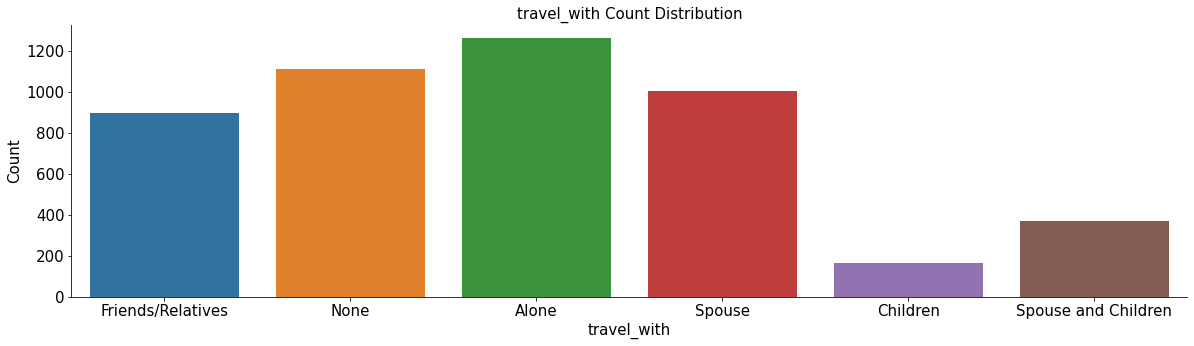

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'travel_with', data = train_df)
ax.set_xlabel('travel_with', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('travel_with Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [11]:
train_df

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [12]:
#relationship between two categorical variables using a Two-way table
pd.crosstab(train_df['main_activity'], train_df['country'], margins=True)

country,ALGERIA,ANGOLA,ARGENTINA,AUSTRALIA,AUSTRIA,BELGIUM,BERMUDA,BRAZIL,BURGARIA,BURUNDI,CANADA,CAPE VERDE,CHILE,CHINA,COLOMBIA,COMORO,CONGO,COSTARICA,CROATIA,CYPRUS,CZECH REPUBLIC,DENMARK,DJIBOUT,DOMINICA,DRC,EGYPT,ESTONIA,ETHIOPIA,FINLAND,FRANCE,GEORGIA,GERMANY,GHANA,GREECE,HUNGARY,INDIA,INDONESIA,IRAN,IRAQ,IRELAND,ISRAEL,ITALY,IVORY COAST,JAPAN,KENYA,KOREA,KUWAIT,LATVIA,LEBANON,LESOTHO,LITHUANIA,LUXEMBOURG,MADAGASCAR,MALAWI,MALAYSIA,MALT,MAURITIUS,MEXICO,MONTENEGRO,MORROCO,MOZAMBIQUE,MYANMAR,NAMIBIA,NEPAL,NETHERLANDS,NEW ZEALAND,NIGER,NIGERIA,NORWAY,OMAN,PAKISTAN,PHILIPINES,POLAND,PORTUGAL,QATAR,ROMANIA,RUSSIA,RWANDA,SCOTLAND,SERBIA,SINGAPORE,SLOVAKIA,SLOVENIA,SOUTH AFRICA,SPAIN,SRI LANKA,SUDAN,SWAZILAND,SWEDEN,SWIZERLAND,TAIWAN,THAILAND,TRINIDAD TOBACCO,TUNISIA,TURKEY,UAE,UGANDA,UKRAIN,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,URUGUAY,YEMEN,ZAMBIA,ZIMBABWE,All
main_activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beach tourism,1,0,0,15,3,7,0,1,1,9,24,0,0,19,1,1,0,0,1,0,0,10,0,0,5,2,0,1,2,55,1,59,0,2,0,16,1,1,0,5,3,210,0,2,42,2,1,0,1,0,0,1,0,6,1,1,0,0,1,0,2,0,1,1,8,1,1,0,4,9,2,0,7,1,1,2,5,14,0,6,1,0,1,78,38,0,2,1,12,9,0,0,0,1,1,11,34,1,1,94,64,1,1,19,76,1025
Bird watching,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,3,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,1,3,0,0,6,4,37
Conference tourism,0,0,0,23,4,1,0,1,0,0,15,0,0,1,0,0,0,0,1,0,5,6,0,0,0,3,0,0,0,25,0,18,0,0,0,1,0,0,0,2,1,5,0,6,3,3,0,1,0,0,1,0,0,1,16,0,0,0,0,0,0,0,0,0,3,5,0,0,3,0,0,0,3,0,0,0,1,1,0,0,3,0,0,2,7,0,0,0,4,4,0,0,0,0,1,1,0,0,3,99,83,0,0,1,0,367
Cultural tourism,0,1,0,9,2,7,1,1,0,22,8,0,0,1,0,0,2,0,0,0,3,5,1,0,10,0,1,0,2,19,0,25,0,2,0,3,0,0,0,2,2,32,0,7,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,1,5,6,0,0,1,1,0,0,0,8,1,0,0,0,0,11,10,0,1,0,3,3,0,0,0,0,1,4,18,0,1,46,42,0,0,4,6,359
Diving and Sport Fishing,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,13
Hunting tourism,0,0,0,4,0,4,0,0,1,16,3,0,0,2,0,0,5,0,0,0,0,3,0,0,4,0,0,0,0,7,0,8,0,2,0,7,0,0,0,1,0,9,1,17,62,1,0,0,0,1,0,0,1,9,2,0,0,0,0,0,1,0,1,0,1,0,0,0,3,12,1,0,0,0,2,0,0,6,1,0,0,0,0,20,5,0,1,0,3,3,0,1,0,0,0,5,43,1,1,43,23,0,1,45,64,457
Mountain climbing,0,0,0,0,1,2,0,1,0,4,3,1,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,5,0,2,0,3,1,0,0,19,1,0,1,0,0,2,0,3,39,0,0,0,2,0,0,0,0,3,0,0,1,0,0,0,4,0,0,1,1,0,0,0,1,2,1,0,0,1,0,0,0,7,0,0,0,0,0,29,1,0,0,0,2,2,0,1,0,0,0,3,14,0,0,11,21,0,0,14,18,234
Wildlife tourism,1,0,1,131,7,27,0,6,0,13,61,0,2,39,2,0,3,1,0,0,3,17,1,1,11,4,0,0,4,165,0,103,1,1,2,36,1,1,0,19,9,122,0,18,72,6,1,1,0,0,3,1,0,1,3,1,1,2,0,1,1,1,0,0,91,12,0,3,5,4,2,2,4,6,4,0,2,3,2,0,3,2,0,81,103,3,0,2,13,41,9,0,1,0,0,8,48,0,6,230,456,0,0,100,105,2259
business,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,4,0,0,0,2,0,0,0,0,1,11,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,8,0,0,0,1,1,58


In [13]:
data=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [14]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

In [15]:
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [16]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

In [17]:
 #convert categorical features to numerical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])

In [18]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [19]:
data.head(2)

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,101,3,1.0,1.0,0,0,0,0,0,0,0,13.0,0.0,0,674602.5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,tour_10,111,2,1.0,0.0,0,0,0,0,0,0,0,14.0,7.0,1,3214906.5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [20]:
data.corr()

,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
country,1.000000,-0.001190,-0.080307,0.001131,-0.137430,-0.122153,-0.111280,-0.095933,-0.059152,-0.087682,-0.086310,-0.011811,-0.153844,-0.107554,-0.065064,-0.127479,-0.026583,0.013227,0.000469,-0.065882,-0.073435,-0.178248,-0.015917,0.083108,0.008655,-0.004178,0.009451,0.007272,0.030908,-0.052736,0.013617,0.072427,0.010128,0.008693,-0.018204,-0.029129,0.015001,0.005990,0.044374,-0.086213,0.006259,0.029773,-0.067542,0.054493,0.001182,-0.006399,0.090255,0.005800,-0.051420,-0.014538,-0.013994,-0.002723
age_group,-0.001190,1.000000,0.039473,0.076864,0.177475,0.170416,0.161986,0.182584,0.190039,0.174089,0.105873,-0.116320,-0.065732,-0.044355,0.217630,0.174666,0.075802,-0.090635,-0.077531,0.182918,0.113266,0.124366,0.035059,-0.023370,-0.104407,-0.044504,-0.209584,0.005536,-0.095923,-0.114949,0.031158,-0.068550,0.039853,0.192223,-0.009112,0.007214,-0.021461,-0.021474,0.003052,0.132040,-0.013099,-0.022154,0.012817,0.043239,-0.066067,-0.027234,-0.027270,0.028993,-0.045919,0.143437,0.020322,0.011682
total_female,-0.080307,0.039473,1.000000,0.416815,0.181528,0.190792,0.173956,0.168385,0.152172,0.146772,0.104529,0.023865,0.116763,0.153414,0.286072,0.198758,0.093827,0.269232,-0.214602,0.033822,0.238675,0.231408,-0.087318,-0.069308,0.015347,-0.029997,0.006980,-0.025797,-0.033898,0.003152,-0.009993,-0.087561,-0.093421,0.073263,-0.006978,-0.036353,-0.009113,-0.022453,-0.040746,0.147324,-0.026857,-0.028361,0.014033,-0.010001,-0.014618,-0.020051,-0.070204,-0.006584,0.018793,0.022294,0.008140,0.009083
total_male,0.001131,0.076864,0.416815,1.000000,0.091160,0.049089,0.033391,0.041725,0.039930,0.032882,0.031458,-0.038078,0.039558,0.028247,0.184696,0.056112,0.081184,0.249725,-0.176179,-0.009767,0.204111,0.066820,-0.019707,-0.003841,-0.027873,-0.037541,-0.060895,-0.007437,-0.003975,0.012752,0.001853,-0.033278,-0.025237,0.006962,0.009518,0.005434,-0.010158,-0.010346,-0.005443,0.051166,-0.016694,-0.012161,0.017719,-0.017230,-0.024854,0.007741,-0.001618,0.010454,-0.005335,0.003937,-0.006677,-0.004374
package_transport_int,-0.137430,0.177475,0.181528,0.091160,1.000000,0.673831,0.624054,0.591270,0.416871,0.424230,0.472700,-0.100050,0.196394,0.265946,0.428362,0.694605,0.022207,0.025443,-0.180441,0.274301,0.153648,0.429828,-0.095601,-0.093352,-0.055641,-0.215195,-0.072821,-0.038789,0.052273,-0.091091,-0.004016,-0.184510,-0.098646,0.085919,0.044548,-0.034099,-0.045865,-0.022550,-0.051892,0.433750,-0.030513,-0.129044,0.028799,-0.053244,-0.004379,-0.027798,-0.082155,0.000485,-0.001948,0.055507,0.007813,0.005388
package_accomodation,-0.122153,0.170416,0.190792,0.049089,0.673831,1.000000,0.923149,0.851816,0.711443,0.725059,0.446520,-0.076906,

In [21]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [22]:
#feature engineering
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]
data['package_transport'] = data['package_transport_int'] + data['package_transport_tz']
data['package_perks'] = data['package_transport'] + data['package_accomodation'] + data['package_food'] + data['package_sightseeing'] + data['package_guided_tour'] + data['package_insurance']
data['travel_accompanied'] = data['travel_with_Children'] + data['travel_with_Friends/Relatives'] + data['travel_with_Spouse'] +data['travel_with_Spouse and Children']
data['travel_purpose'] = data['purpose_Leisure and Holidays'] + data['purpose_Meetings and Conference'] + data['purpose_Other'] +data['purpose_Scientific and Academic'] + data['purpose_Visiting Friends and Relatives']+data['purpose_Volunteering']
data['payment'] =  data['payment_mode_Other'] +data['payment_mode_Travellers Cheque'] + data['payment_mode_Credit Card']
data['touring_activity'] = data['main_activity_Bird watching']+ data['main_activity_Conference tourism']+data['main_activity_Cultural tourism']+ data['main_activity_Diving and Sport Fishing']+ data['main_activity_Hunting tourism']+ data['main_activity_Mountain climbing'] + data['main_activity_Wildlife tourism']

In [23]:
#scale the columns
scaler = MinMaxScaler()
data[['country', 'total_female', 'total_male' ,'night_mainland', 'night_zanzibar' ,'total_persons' , 'total_nights_spent']]  = scaler.fit_transform(data[['country', 'total_female', 'total_male' ,'night_mainland', 'night_zanzibar' ,'total_persons' , 'total_nights_spent']])

In [24]:
data.corr()

,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,total_persons,total_nights_spent,package_transport,package_perks,travel_accompanied,travel_purpose,payment,touring_activity
country,1.000000,-0.001190,-0.079837,0.001135,-0.137430,-0.122153,-0.111280,-0.095933,-0.059152,-0.087682,-0.086310,-0.011811,-0.153844,-0.107554,-0.065064,-0.127479,-0.026583,0.013227,0.000469,-0.065882,-0.073435,-0.178248,-0.015917,0.083108,0.008655,-0.004178,0.009451,0.007272,0.030908,-0.052736,0.013617,0.072427,0.010128,0.008693,-0.018204,-0.029129,0.015001,0.005990,0.044374,-0.086213,0.006259,0.029773,-0.067542,0.054493,0.001182,-0.006399,0.090255,0.005800,-0.051420,-0.014538,-0.013994,-0.002723,-0.048250,-0.059733,-0.130118,-0.121577,-0.092289,-0.219491,-0.016516,0.055391
age_group,-0.001190,1.000000,0.039793,0.076856,0.177475,0.170416,0.161986,0.182584,0.190039,0.174089,0.105873,-0.116320,-0.065732,-0.044355,0.217630,0.174666,0.075802,-0.090635,-0.077531,0.182918,0.113266,0.124366,0.035059,-0.023370,-0.104407,-0.044504,-0.209584,0.005536,-0.095923,-0.114949,0.031158,-0.068550,0.039853,0.192223,-0.009112,0.007214,-0.021461,-0.021474,0.003052,0.132040,-0.013099,-0.022154,0.012817,0.043239,-0.066067,-0.027234,-0.027270,0.028993,-0.045919,0.143437,0.020322,0.011682,0.068607,-0.124487,0.201892,0.202949,0.166496,0.007550,0.145835,0.075477
total_female,-0.079837,0.039793,1.000000,0.416396,0.181054,0.190490,0.173629,0.168254,0.151955,0.146324,0.104063,0.023811,0.116563,0.153072,0.286205,0.198463,0.093897,0.268241,-0.214319,0.034056,0.238766,0.231218,-0.087182,-0.069219,0.015405,-0.029814,0.006368,-0.025751,-0.033765,0.003282,-0.009969,-0.087397,-0.093299,0.072765,-0.006929,-0.036654,-0.009004,-0.022397,-0.040679,0.147206,-0.026821,-0.028206,0.014141,-0.009684,-0.014487,-0.020794,-0.070070,-0.006547,0.018573,0.022468,0.008160,0.009098,0.852180,0.058476,0.195573,0.195184,0.399472,0.211377,0.024253,-0.048879
total_male,0.001135,0.076856,0.416396,1.000000,0.091149,0.049079,0.033374,0.041712,0.039919,0.032865,0.031435,-0.038080,0.039566,0.028246,0.184657,0.056096,0.081188,0.249691,-0.176175,-0.009756,0.204116,0.066815,-0.019713,-0.003855,-0.027871,-0.037534,-0.060892,-0.007435,-0.003980,0.012757,0.001854,-0.033281,-0.025233,0.006953,0.009520,0.005428,-0.010166,-0.010344,-0.005441,0.051153,-0.016693,-0.012154,0.017711,-0.017222,-0.024849,0.007749,-0.001624,0.010455,-0.005338,0.003936,-0.006676,-0.004373,0.830573,-0.021208,0.073658,0.055456,0.325931,0.002834,0.002561,-0.024093
package_transport_int,-0.137430,0.177475,0.181054,0.091149,1.000000,0.673831,0.624054,0.591270,0.416871,0.424230,0.472700,-0.100050,0.196394,0.265946,0.428362,0.694605,0.022207,0.025443,-0.180441,0.274301,0.153648,0.429828

In [25]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

In [26]:
print(train_df.shape)
print(test_df.shape)

(4809, 61)
(1601, 61)


In [27]:
train_df.describe()

,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,total_persons,total_nights_spent,package_transport,package_perks,travel_accompanied,travel_purpose,payment,touring_activity
count,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000
mean,0.638392,2.157413,0.018902,0.022945,0.301934,0.458931,0.428571,0.393013,0.309836,0.322312,0.151799,0.012783,0.013244,0.674361,8.114389e+06,0.465585,0.033687,0.186109,0.231649,0.208983,0.076523,0.590559,0.064878,0.026617,0.018091,0.131628,0.028696,0.007694,0.076315,0.074652,0.002703,0.095030,0.048659,0.469744,0.012061,0.074652,0.051778,0.014140,0.016012,0.397796,0.003743,0.101892,0.056353,0.320441,0.075899,0.154502,0.065086,0.006446,0.105427,0.129341,0.001664,0.001456,0.020814,0.012879,0.694947,2.366396,0.505303,0.860470,0.132460,0.774797
std,0.326919,1.019347,0.026287,0.025870,0.459144,0.498362,0.494923,0.488470,0.462474,0.467410,0.358863,0.015704,0.024294,0.468662,1.222490e+07,0.498866,0.180441,0.389235,0.421930,0.406625,0.265861,0.491782,0.246337,0.160977,0.133295,0.338121,0.166969,0.087386,0.265529,0.262856,0.051928,0.293287,0.215176,0.499136,0.109168,0.262856,0.221601,0.118081,0.125533,0.489494,0.061072,0.302538,0.230625,0.466695,0.264865,0.361467,0.246704,0.080038,0.307135,0.335612,0.040757,0.038129,0.022356,0.012863,0.843085,2.674695,0.500024,0.346535,0.339025,0.417759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350427,2.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004518,0.000000,0.000000,8.121750e+05,0.000000,0.000000

In [28]:
#Modelling
feat_cols = train_df.drop(["ID","total_cost"],1)
# feat_cols[ 'package_perks' , 'total_nights_spent',  'travel_accompanied' , 'travel_purpose' , 'payment' , 'touring_activity']
cols = feat_cols.columns
target=train_df["total_cost"]


In [29]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import KFold, cross_val_score

In [30]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.25, random_state = 42)

#create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

#small dataset:/

(2704, 59) (2704,)
(1203, 59) (1203,)
(902, 59) (902,)


In [31]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators= 50,learning_rate = 0.04, random_state=42 , colsample_bylevel= 0.5 ,colsample_bytree = 0.6 , max_depth =7, min_child_weight= 5,gamma=1, subsample= 0.6)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)



[07:57:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print('Error {}'.format(mae))

Error 4785496.094314008


In [33]:
#predict and prepare submission file
sub = test_df[cols]
predictions_xgb  = xgb.predict(sub)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)